### Download Remaining Libraries

In [ ]:
!pip install timm
!pip install einops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Display the Available Models

In [ ]:
timm.list_models('*')

964

In [ ]:
timm.list_models(pretrained=True)

['adv_inception_v3',
 'bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_224_in22k',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_224_in22k',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'beitv2_base_patch16_224',
 'beitv2_base_patch16_224_in22k',
 'beitv2_large_patch16_224',
 'beitv2_large_patch16_224_in22k',
 'botnet26t_256',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_tiny',
 'coatnet_0_rw_224',
 'coatnet_1_rw_224',
 'coatnet_bn_0_rw_224',
 'coatnet_nano_rw_224',
 'coatnet_rmlp_1_rw_224',
 'coatnet_rmlp_nano_rw_224',
 'convit_base',
 'convit_small',
 'convit_tiny',
 'convmixer_768_32',
 'convmixer_1024_20_ks9_p14',
 'convmixer_1536_20',
 'convnext_atto',
 'convnext_atto_ols',
 'convnext_base',
 'convnext_base_384_in22ft1

In [ ]:
timm.list_models("resnet34*", pretrained=False)

['resnet34', 'resnet34d']

### Application of Rower Atienza's Example

GitHub: https://github.com/roatienza/Deep-Learning-Experiments/blob/master/versions/2022/tools/python/pytorch_demo.ipynb


In [65]:
import os
import torch 
import torchvision.transforms as transforms
import timm 
import urllib

from einops import rearrange
from PIL import Image

In [70]:
# Download and load the pretrained ResNet-34.

resnet34 = timm.create_model("resnet34", pretrained=True)

#### First: Loading an input image and transform to tensor

Ringo Inside the Hamper.jpeg


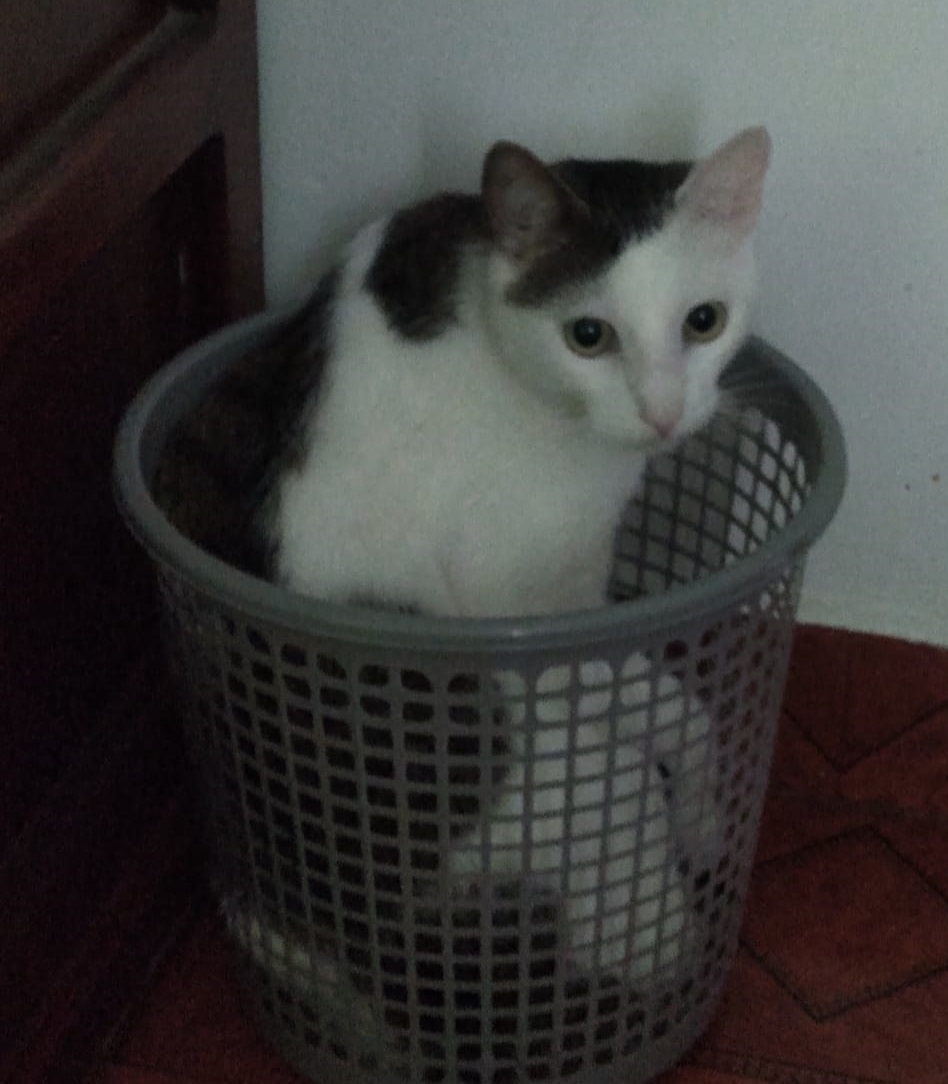

Type: torch.float32
Shape: torch.Size([3, 224, 224])


In [72]:
filename = input()

# Load a PIL Image given a file name from the current directory.
img = Image.open(filename)

# Display the loaded image on notebook.
display(img)

# Transform image to tensor used by Marat Dukhan: https://github.com/pytorch/examples/blob/42e5b996718797e45c46a25c55b031e6768f8440/imagenet/main.py#L89-L101
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
transform = transforms.Compose([transforms.Resize(256),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                normalize])
img = transform(img)

# Check img type and shape
print("Type:", img.dtype)
print("Shape:", img.shape)

### Second: Making a prediction


In [73]:
# We need the tensor to have a batch dimension of 1.
img = rearrange(img, 'c h w  -> 1 c h w')
print("New shape:", img.shape)

pred = resnet34(img)
print("Prediction shape:", pred.shape)

pred = torch.argmax(pred, dim=1)
print("Predicted index", pred)

New shape: torch.Size([1, 3, 224, 224])
Prediction shape: torch.Size([1, 1000])
Predicted index tensor([588])


#### Third: Convert class index to label


In [74]:
filename = "imagenet1000_labels.txt"
url = "https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt"

# Download the file if it does not exist
if not os.path.isfile(filename):
    urllib.request.urlretrieve(url, filename)

with open(filename) as f:
    idx2label = eval(f.read())

idx2label 
pred.cpu().numpy()[0]
#print("Predicted label:", idx2label[pred.cpu().numpy()[0]])

Predicted label: hamper
